In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set(rc={'axes.facecolor': '#f8f5f1', 'figure.facecolor':'white'})
sns.set_color_codes('pastel')

In [2]:
df = pd.read_csv('Country COVID Cases.csv', index_col = 'Countries')
df
from sklearn import preprocessing
df

,Latitudes,Longitudes,Population,Cases,Deaths,Case to Death Ratio,Vaccines percentage,Absolute Vaccine Volume,Median Age
Countries,,,,,,,,,
Afghanistan,33.94,-67.71,30800000,57898,2546,22.741,0.003,0.620,16.5
Argentina,38.42,-63.62,44900000,2710000,59476,45.565,0.018,15.060,31.1
Armenia,40.07,-45.04,2906000,209000,3895,53.659,0.000,0.002,35.4
Australia,-25.27,-133.78,25400000,29559,910,32.482,0.006,7.280,37.2
Austria,47.52,-14.55,8759187,596000,9922,60.069,0.202,30.660,42.7
...,...,...,...,...,...,...,...,...,...
Uzbekistan,41.38,-64.59,33600000,86982,638,136.335,0.010,1.370,27.8
Venezuela,6.42,66.59,28500000,185000,1925,96.104,0.009,0.880,27.0
Vietnam,14.06,-108.28,96500000,2791,35,79.743,0.001,0.180,29.8


,Latitudes,Longitudes
Countries,,
Afghanistan,33.94,-67.71
Argentina,38.42,-63.62
Armenia,40.07,-45.04
Australia,-25.27,-133.78
Austria,47.52,-14.55
...,...,...
Uzbekistan,41.38,-64.59
Venezuela,6.42,66.59
Vietnam,14.06,-108.28


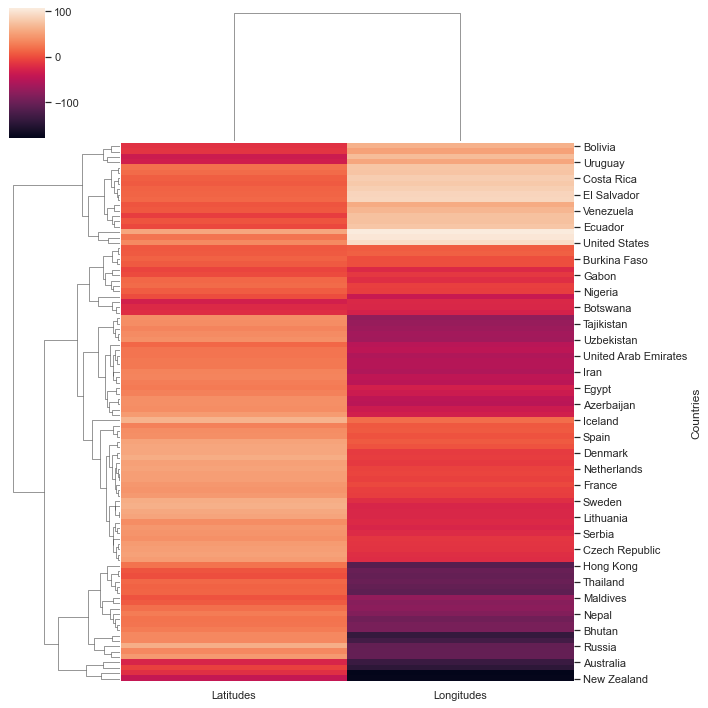

In [3]:
location = pd.DataFrame(df.iloc[:, :2])
sns.clustermap(location, cmap = 'rocket')
location

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

from sklearn.model_selection import train_test_split
covid = df.iloc[:, 3:5]
X_train, X_test, y_train, y_test = train_test_split(covid.iloc[:, :1], covid.iloc[:, 1:], train_size = 0.75, random_state=0)

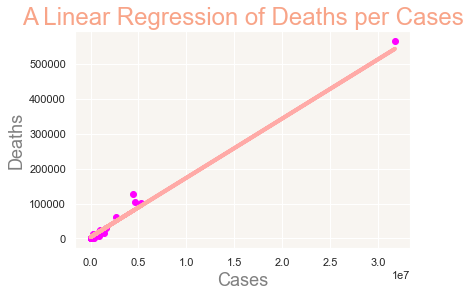

In [5]:
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
plt.scatter(X_test, y_test, c = 'magenta')
cases_to_death = plt.plot(X_test, predictions, c = '#ffaaa7', lw = 4)
plt.xlabel('Cases', size = 18, c = 'Gray')
plt.ylabel('Deaths', size = 18, c = 'Gray')
plt.title('A Linear Regression of Deaths per Cases', size = 24, c = '#f8a488')
plt.show()

In [6]:
predictions

array([[  7822.06799686],
       [ 14951.58970806],
       [  7686.26758331],
       [  4588.40552454],
       [ 83242.22267033],
       [543945.12562735],
       [  4218.40032278],
       [  7482.56696299],
       [ 10538.07626779],
       [  5615.0057258 ],
       [  5244.30454692],
       [ 78658.95871313],
       [  4207.02703815],
       [  4361.66975907],
       [ 16411.44415369],
       [ 94106.25575407],
       [ 31298.56448874],
       [  4628.36479623],
       [  5695.24679515],
       [ 20298.73099146],
       [ 18346.60004673],
       [ 28073.30466701],
       [  4640.24733241],
       [ 49971.1213514 ],
       [  4887.69266095]])

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(6)
kmeans.fit(df.iloc[:, :2])
df['Cluster Prediction'] = kmeans.predict(df.iloc[:, :2])

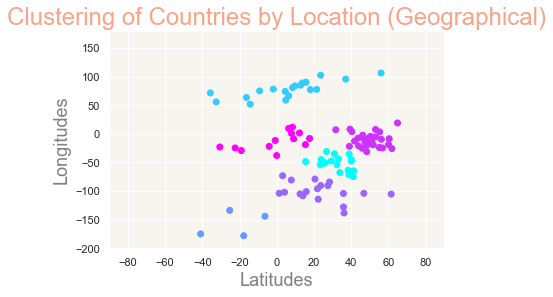

In [8]:
plt.scatter(df['Latitudes'], df['Longitudes'], c = df['Cluster Prediction'], cmap = 'cool')
plt.xlabel('Latitudes', size = 18, c = 'Gray')
plt.ylabel('Longitudes', size = 18, c = 'Gray')
plt.title('Clustering of Countries by Location (Geographical)', size = 24, c = '#f8a488')
plt.xlim(-90, 90)
plt.ylim(-200, 180)
plt.show()

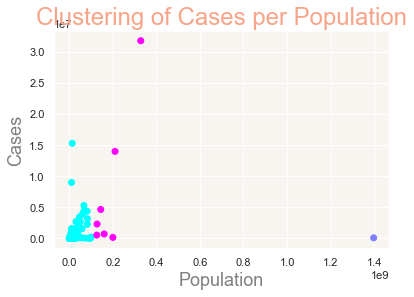

In [9]:
population_to_cases = df.iloc[:, 2:4]
new_kmeans = KMeans(3,random_state=0).fit(population_to_cases)
population_to_cases['Cluster Prediction'] = new_kmeans.predict(population_to_cases)

plt.scatter(df['Population'], df['Cases'], c = population_to_cases['Cluster Prediction'], cmap = 'cool')
plt.xlabel('Population', size = 18, c = 'Gray')
plt.ylabel('Cases', size = 18, c = 'Gray')
plt.title('Clustering of Cases per Population', size = 24, c = '#f8a488')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
population_cases_scaled = scale.fit_transform(population_to_cases.iloc[:, 0:2])

In [11]:
population_cases_scaled = pd.DataFrame(population_cases_scaled, columns = ['Population', 'Cases'])

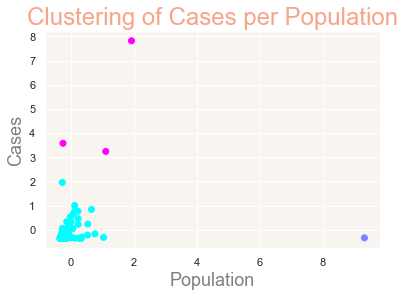

In [12]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(3,random_state=0).fit(population_cases_scaled)
population_cases_scaled['Cluster Prediction'] = kmeans2.predict(population_cases_scaled)

plt.scatter(population_cases_scaled['Population'], population_cases_scaled['Cases'], c = population_cases_scaled['Cluster Prediction'], cmap = 'cool')
plt.xlabel('Population', size = 18, c = 'Gray')
plt.ylabel('Cases', size = 18, c = 'Gray')
plt.title('Clustering of Cases per Population', size = 24, c = '#f8a488')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scale2 = StandardScaler()
population_to_vaccines = pd.DataFrame(df.iloc[:, 2:3], columns = ['Population'])

In [14]:
population_vaccines_scaled = pd.DataFrame(scale2.fit_transform(population_to_vaccines), columns = ['Population'])
population_vaccines_scaled
vaccines = df.iloc[:, 7:8]
vaccines = pd.DataFrame(scale2.fit_transform(vaccines), columns = ['Vaccines'])
vaccines
population_vaccines_scaled = pd.concat([population_vaccines_scaled, vaccines], axis = 1)
population_vaccines_scaled

,Population,Vaccines
0,-0.119749,-0.817338
1,-0.022400,-0.177096
2,-0.312335,-0.844739
3,-0.157032,-0.522046
4,-0.271924,0.514578
...,...,...
95,-0.100418,-0.784085
96,-0.135629,-0.805810
97,0.333857,-0.836847
98,-0.130796,-0.844828


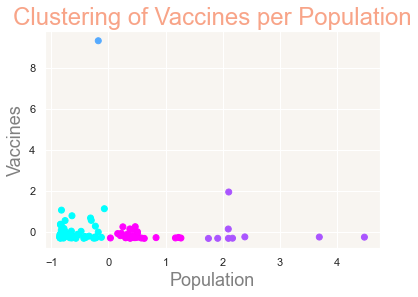

In [15]:
kmeans3 = KMeans(4,random_state=0).fit(population_vaccines_scaled)
population_vaccines_scaled['Cluster Prediction'] = kmeans3.predict(population_vaccines_scaled)

plt.scatter(population_vaccines_scaled['Vaccines'], population_vaccines_scaled['Population'], c = population_vaccines_scaled['Cluster Prediction'], cmap = 'cool')
plt.xlabel('Population', size = 18, c = 'Gray')
plt.ylabel('Vaccines', size = 18, c = 'Gray')
plt.title('Clustering of Vaccines per Population', size = 24, c = '#f8a488')
plt.show()

In [16]:
cases = df.iloc[:, 3:4]
cases_scaled = scale2.fit_transform(cases)
cases_scaled = pd.DataFrame(cases_scaled, columns = ['Cases'])

In [17]:
cases_to_vaccines = pd.concat([cases_scaled, vaccines], axis = 1)

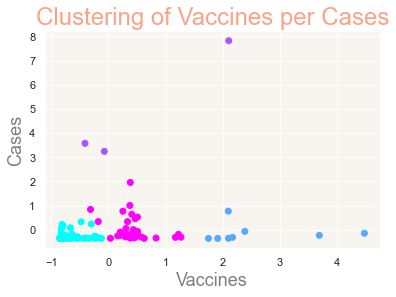

In [18]:
kmeans4 = KMeans(4,random_state=0).fit(cases_to_vaccines)
cases_to_vaccines['Cluster Prediction'] = kmeans4.predict(cases_to_vaccines)

plt.scatter(cases_to_vaccines['Vaccines'], cases_to_vaccines['Cases'], c = cases_to_vaccines['Cluster Prediction'], cmap = 'cool')
plt.xlabel('Vaccines', size = 18, c = 'Gray')
plt.ylabel('Cases', size = 18, c = 'Gray')
plt.title('Clustering of Vaccines per Cases', size = 24, c = '#f8a488')
plt.show()

In [19]:
median_age = df.iloc[:, 8:9]

In [20]:
median_age_scaled = pd.DataFrame(scale.fit_transform(median_age), columns = ['Median Age'])

In [21]:
population = pd.DataFrame(scale.fit_transform(df.iloc[:, 2:3]), columns = ['Population'])

In [22]:
median_age_scaled['Population'] = population
median_age_scaled

,Median Age,Population
0,-1.758253,-0.119749
1,-0.037826,-0.022400
2,0.468875,-0.312335
3,0.680983,-0.157032
4,1.329089,-0.271924
...,...,...
95,-0.426690,-0.100418
96,-0.520960,-0.135629
97,-0.191015,0.333857
98,-1.451876,-0.130796


In [23]:
kmeans5 = KMeans(4).fit(median_age_scaled)
median_age_scaled['Cluster Prediction'] = kmeans5.predict(median_age_scaled)
median_age_scaled

,Median Age,Population,Cluster Prediction
0,-1.758253,-0.119749,3
1,-0.037826,-0.022400,0
2,0.468875,-0.312335,2
3,0.680983,-0.157032,2
4,1.329089,-0.271924,2
...,...,...,...
95,-0.426690,-0.100418,0
96,-0.520960,-0.135629,0
97,-0.191015,0.333857,0
98,-1.451876,-0.130796,3


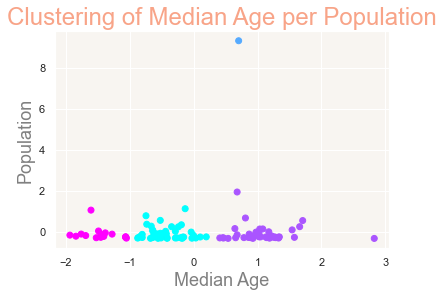

In [28]:
plt.scatter(median_age_scaled['Median Age'], median_age_scaled['Population'], c = median_age_scaled['Cluster Prediction'], cmap = 'cool')
plt.xlabel('Median Age', size = 18, c = 'Gray')
plt.ylabel('Population', size = 18, c = 'Gray')
plt.title('Clustering of Median Age per Population', size = 24, c = '#f8a488')
plt.show()

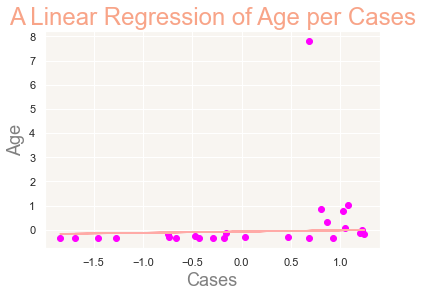

In [25]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(median_age_scaled.iloc[:, :1].values, cases_to_vaccines.iloc[:, :1], train_size = 0.75, random_state=0)

regressor.fit(X_train2, y_train2)

predictions2 = regressor.predict(X_test2)
plt.scatter(X_test2, y_test2, c = 'magenta')
cases_to_death = plt.plot(X_test2, predictions2, c = '#ffaaa7')
plt.xlabel('Cases', size = 18, c = 'Gray')
plt.ylabel('Age', size = 18, c = 'Gray')
plt.title('A Linear Regression of Age per Cases', size = 24, c = '#f8a488')
plt.show()

In [26]:
predictions2

array([[-0.11078257],
       [-0.00943107],
       [-0.04924773],
       [-0.08242828],
       [-0.03175253],
       [-0.03838864],
       [-0.16749115],
       [-0.07156919],
       [-0.09751035],
       [-0.09509722],
       [-0.0257197 ],
       [-0.02029016],
       [-0.14758282],
       [-0.15964848],
       [-0.11138586],
       [-0.01787703],
       [-0.01968688],
       [-0.10716288],
       [-0.13853358],
       [-0.0118442 ],
       [-0.08122172],
       [-0.01063763],
       [-0.03838864],
       [-0.02873612],
       [-0.08785783]])